## Main Library

In [3]:
# Reading Data & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imimage
import seaborn as sns
import PIL as pil

from tensorflow.keras.datasets import mnist
import tensorflow as tf
import tensorflow.keras as k
import cv2 as cv
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D

# Data Preprocessing 
from tensorflow.math import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, accuracy_score

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

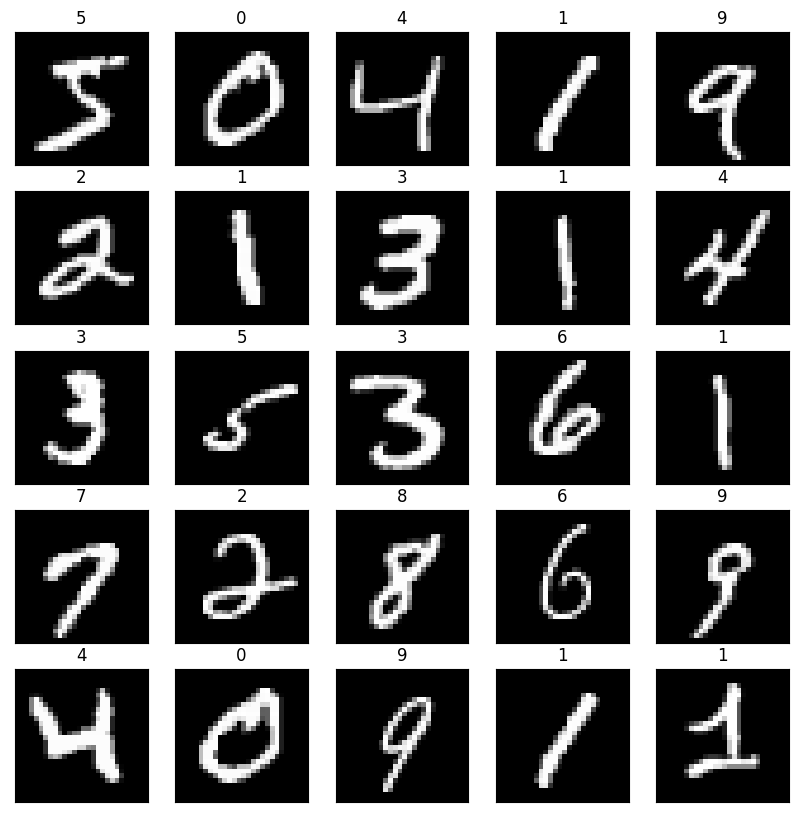

In [20]:
plt.figure(figsize=(10, 10))

for i in range(25):    
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])

In [21]:
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [22]:
x_train_std = x_train / 255
x_test_std = x_test / 255

In [23]:
x_train[0].shape, y_train[0]

((28, 28), 5)

In [25]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train[0], y_test.shape

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), (10000, 10))

In [27]:
y_train.shape

(60000, 10)

## Building Neural Network Model

In [30]:
# model = k.models.Sequential([
#     k.layers.Flatten(input_shape=(28, 28)),
#     k.layers.Dense(64, activation="relu"),
#     k.layers.Dense(32, activation="relu"),
#     k.layers.Dense(16, activation="relu"),
# #     k.layers.Dense(1, activation="softmax")
#     k.layers.Dense(1, activation="sigmoid")
# ])

# # model.compile(optimizer="adam", 
# #              loss=k.losses.SparseCategoricalCrossentropy(), 
# #              metrics=["accuracy"])

# model.compile(optimizer="adam", 
#              loss=k.losses.BinaryCrossentropy(), 
#              metrics=["accuracy"])


model = k.models.Sequential()
# CNN
model.add(k.layers.Conv2D(8, (5, 5), input_shape=(28, 28, 1), activation="relu" ,padding="same"))
model.add(k.layers.Conv2D(32, (3, 3), activation="relu" ,padding="same"))

model.add(k.layers.AveragePooling2D((2, 2)))
model.add(k.layers.Conv2D(64, (3, 3), activation="relu" ,padding="same"))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu" ,padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))


model.add(k.layers.Conv2D(128, (3, 3), activation="relu" ,padding="same"))
model.add(Dropout(0.4))

# ANN
model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
model.add(Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))

model.add(k.layers.Dense(10, activation="softmax"))

model.compile(optimizer=tf.optimizers.Adam(0.001, beta_1=0.86, beta_2=0.999), loss=tf.losses.CategoricalCrossentropy(),
             metrics=["accuracy"])

In [31]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2 , validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.1974 - accuracy: 0.9413 - val_loss: 0.0409 - val_accuracy: 0.9880
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0783 - accuracy: 0.9780 - val_loss: 0.0405 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0647 - accuracy: 0.9824 - val_loss: 0.0357 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0574 - accuracy: 0.9837 - val_loss: 0.0222 - val_accuracy: 0.9940
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0536 - accuracy: 0.9856 - val_loss: 0.0302 - val_accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0494 - accuracy: 0.9860 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0428 - accuracy: 0.9882 - val_loss: 0.0305 - val_ac

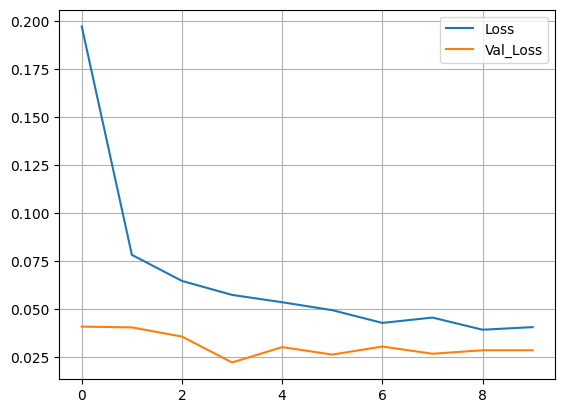

In [32]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val_Loss")

plt.legend()
plt.grid()
plt.show()

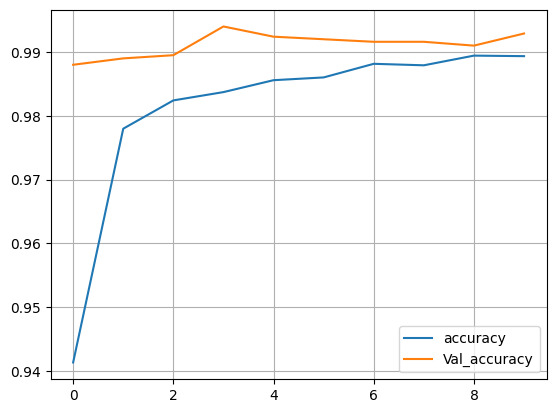

In [33]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="Val_accuracy")

plt.legend()
plt.grid()
plt.show()

In [34]:
loss, accuracy = model.evaluate(x_test, y_test)

print(f"The Accuracy SCore is ==> {round(accuracy, 4)} %")
print(f"The loss Error is ==> {round(loss, 4)}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0285 - accuracy: 0.9929
The Accuracy SCore is ==> 0.9929 %
The loss Error is ==> 0.0285


In [35]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
prediction = [np.argmax(i) for i in prediction]

### Accuracy  & R2_Score

In [37]:
print(f"The Accuracy Score is ==> {accuracy_score(prediction, y_test)}")

print(f"The R2_score is ==> {r2_score(prediction, y_test)}")

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

# ====================================================
# ====================================================
# ====================================================

##  Confusion Matrix

In [40]:
cnma = confusion_matrix(y_test, prediction)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [39]:
cnma

NameError: name 'cnma' is not defined

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(cnma, annot=True, square=True, fmt="0.2f", cmap="Blues")
plt.title("Prediction Label")
plt.show()

## System Prediction

Please Enter The Path of Image: C:\Users\osama\OneDrive\Desktop\download.jpg
(225, 225)
1/1 [==============================] - 0s 17ms/step
[0.03806054 0.2444409  0.05997779 0.04575434 0.05907398 0.05584958
 0.01347955 0.28843868 0.0959211  0.0990035 ]
The Number Prediction is ==> = 7


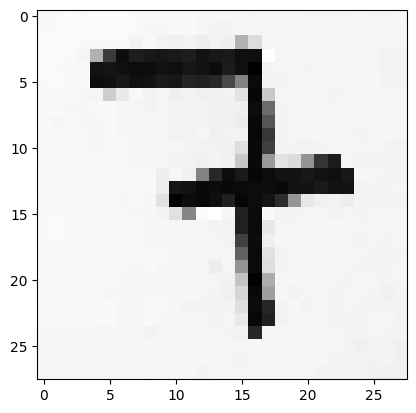

In [43]:
path_image = input("Please Enter The Path of Image: ")

image = cv.imread(path_image)

image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

print(image.shape)

image = cv.resize(image, (28, 28))


plt.imshow(image, cmap="gray")

new_image = np.reshape(image, [1, 28, 28])

new_predict = model.predict(new_image)[0]
print(new_predict)

print(f"The Number Prediction is ==> = {new_predict.argmax()}")